This is a notebook to test the RL-Chord paper: https://ieeexplore.ieee.org/abstract/document/10063204

For now it's intended to be used on google colab.

# Installing files and dependencies

In [1]:
!git clone https://github.com/mlb-alumno/RL-Chord.git

Cloning into 'RL-Chord'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 172 (delta 10), reused 30 (delta 7), pack-reused 138 (from 2)
Receiving objects: 100% (172/172), 181.41 MiB | 26.55 MiB/s, done.
Resolving deltas: 100% (66/66), done.
Updating files: 100% (71/71), done.


In [2]:
!pip install muspy tensorboardX

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 61.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.1/119.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.8 MB/s eta 0:00:00
  Created wheel for pretty-midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592287 sha256=25b33e48b02c8cb646946734060a68b90baa4eb27fdf6c389d6fb73025e8757b
  Stored in directory: /root/.cache/pip/wheels/e6/95/ac/15ceaeb2823b04d8e638fd1495357adb8d26c00ccac9d7782e
Successfully built pretty-midi


In [3]:
!pip install midi2audio
!apt-get install -y fluidsynth

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin libinput10
  libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5 libqt5gui5 libqt5network5
  libqt5svg5 libqt5widgets5 libwacom-bin libwacom-common libwacom9 libxcb-icccm4 libxcb-image0
  libxcb-keysyms1 libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme qttranslations5-l10n timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs qt5-image-formats-plugins qtwayland5 jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin libinput10
  libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5 libqt5gui5 libqt5network5
  libqt5svg5 libqt5widgets5 libwacom-bin libwacom-common libwacom9 libxcb-icc

In [4]:
%cd RL-Chord

/content/RL-Chord


# Train

Run the next cell ONLY if you want to train the model with other parameters (it will take a while, remember to turn on GPU):

In [5]:
!python PG-Chord_train.py --epoch 20 --batch_size 64 # add this to resume weights from previous model --load_model epoch2_reward191.339_mle_loss216.896_beta0.047.pth # epoch is the number of epochs it will train, batch_size originally 64

Traceback (most recent call last):
  File "/content/RL-Chord/PG-Chord_train.py", line 18, in <module>
    from train_utils import batch_data_win, Reward, timeSince, plot_RL, multilabel_categorical_crossentropy
  File "/content/RL-Chord/train_utils.py", line 12, in <module>
    from evaluate_utils import duration2type
  File "/content/RL-Chord/evaluate_utils.py", line 6, in <module>
    from music21 import *
  File "/usr/local/lib/python3.11/dist-packages/music21/__init__.py", line 195, in <module>
    from music21.test.testRunner import mainTest  # noqa: E402
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/music21/test/__init__.py", line 4, in <module>
    from music21.test import test_chord as chord
  File "/usr/local/lib/python3.11/dist-packages/music21/test/test_chord.py", line 9, in <module>
    from music21.musicxml import m21ToXml
  File "/usr/local/lib/python3.11/dist-packages/music21/musicxml/__init__.py", line 23, in <module>
  

### Here is the cell to train with different hyperparameters

In [6]:
!python PG-Chord_train_modified.py --epoch 20 --batch_size 64 --load_model epoch2_reward1145.825_mle_loss335.805_beta0.800.pth # add this to resume weights from previous model # epoch is the number of epochs it will train, batch_size originally 64

/content/RL-Chord/PG-Chord_train_modified.py:323: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dict = torch.load(load_model_path, map_location=device)
--------------------e

## Create a harmony for your midi melody

In [21]:
!python RL_evaluate.py --model 'PG'  --load_model 'epoch1_reward1101.526_mle_loss355.816_beta0.800.pth' --input_path 'input_melody/testmel2.mid' --output_path 'output-harmonization/testmel-parameters.mid' --temperature 0.9

/content/RL-Chord/RL_evaluate.py:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(load_model_path, map_location=device)
output-harmonization/testme

## Listen to the harmonization!

## Input melody

In [9]:
import IPython.display as ipd
from midi2audio import FluidSynth

# Specify your MIDI file path here (you can upload it to Colab)
midi_file = 'input_melody/testmel2.mid'  # replace with your actual file name
wav_file = 'output.wav'

# Convert the MIDI file to a WAV file
fs = FluidSynth()
fs.midi_to_audio(midi_file, wav_file)

# Play the audio
ipd.display(ipd.Audio(wav_file))

## Output Harmonication

In [22]:
import IPython.display as ipd
from midi2audio import FluidSynth

# Specify your MIDI file path here (you can upload it to Colab)
midi_file = 'output-harmonization/testmel-parameters.mid'  # replace with your actual file name
wav_file = 'output.wav'

# Convert the MIDI file to a WAV file
fs = FluidSynth()
fs.midi_to_audio(midi_file, wav_file)

# Play the audio
ipd.display(ipd.Audio(wav_file))

## Other utilities

## Plotting results

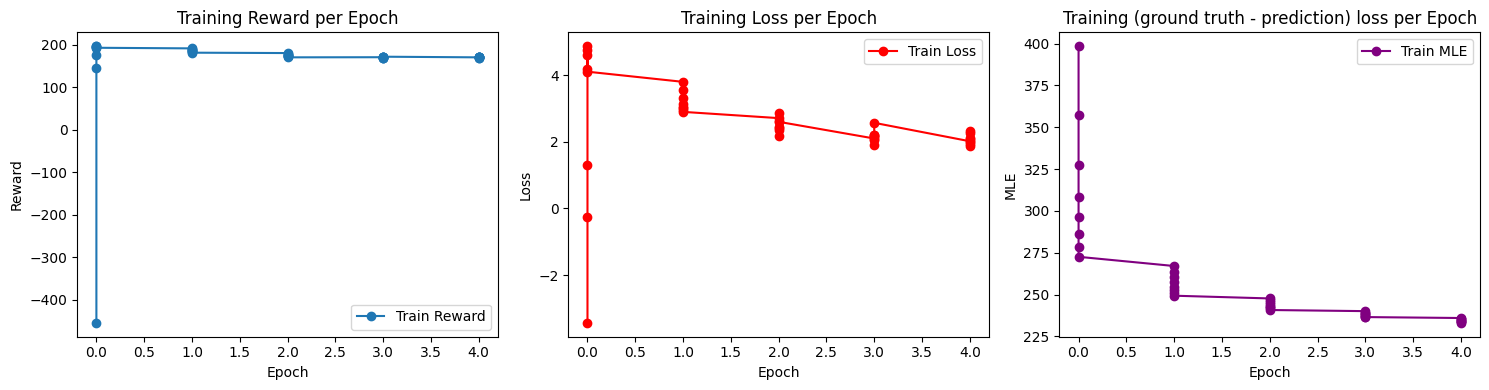

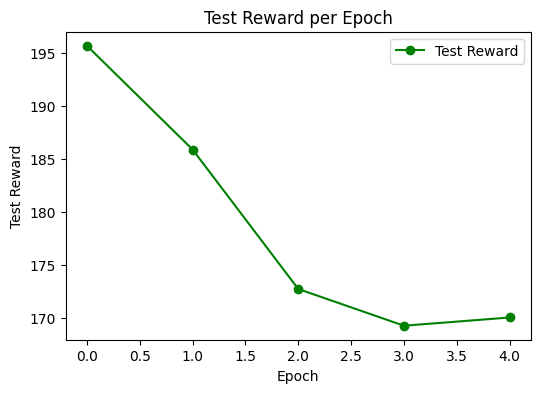

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Read the log file
with open("logs/NMD-PG-MH-64.txt", "r") as f:
    lines = f.readlines()

# Initialize lists to collect training and test data
train_data = []
test_data = []
current_epoch = None

# Process each line in the log file
for line in lines:
    line = line.strip()

    # Check for epoch header line (e.g., "--------------------epoch:  0 ---------------------")
    epoch_match = re.match(r"-+epoch:\s+(\d+)\s*-+", line)
    if epoch_match:
        current_epoch = int(epoch_match.group(1))
        continue

    # Parse training lines
    train_match = re.match(
        r"epoch train:(\d+),.*reward:\s*([-\d.]+)\s+loss:\s*([-\d.]+)\s+mle:\s*([-\d.]+)\s+beta:\s*([-\d.]+)",
        line
    )
    if train_match:
        train_epoch = int(train_match.group(1))
        reward = float(train_match.group(2))
        loss = float(train_match.group(3))
        mle = float(train_match.group(4))
        beta = float(train_match.group(5))
        train_data.append({
            "epoch": train_epoch,
            "reward": reward,
            "loss": loss,
            "mle": mle,
            "beta": beta
        })
        continue

    # Parse test lines (if any)
    test_match = re.match(
        r"test aver_reward:\s*([-\d.]+)\s+test MLE_loss:\s*([-\d.]+)",
        line
    )
    if test_match:
        test_reward = float(test_match.group(1))
        test_mle = float(test_match.group(2))
        test_data.append({
            "epoch": current_epoch,
            "test_reward": test_reward,
            "test_mle": test_mle
        })

# Create DataFrames
df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)

# Visualize Training Metrics including mle
plt.figure(figsize=(15, 4))

# Plot Reward
plt.subplot(1, 3, 1)
plt.plot(df_train["epoch"], df_train["reward"], marker="o", label="Train Reward")
plt.xlabel("Epoch")
plt.ylabel("Reward")
plt.title("Training Reward per Epoch")
plt.legend()

# Plot Loss
plt.subplot(1, 3, 2)
plt.plot(df_train["epoch"], df_train["loss"], marker="o", color="red", label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.legend()

# Plot MLE
plt.subplot(1, 3, 3)
plt.plot(df_train["epoch"], df_train["mle"], marker="o", color="purple", label="Train MLE")
plt.xlabel("Epoch")
plt.ylabel("MLE")
plt.title("Training (ground truth - prediction) loss per Epoch")
plt.legend()

plt.tight_layout()
plt.show()

# Visualize Test Metrics if available
if not df_test.empty:
    plt.figure(figsize=(6, 4))
    plt.plot(df_test["epoch"], df_test["test_reward"], marker="o", color="green", label="Test Reward")
    plt.xlabel("Epoch")
    plt.ylabel("Test Reward")
    plt.title("Test Reward per Epoch")
    plt.legend()
    plt.show()



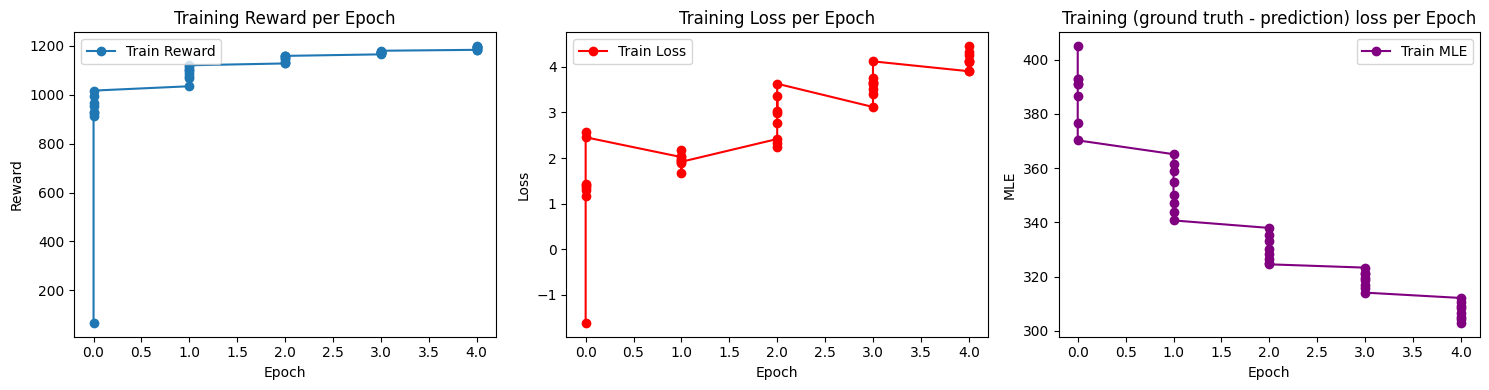

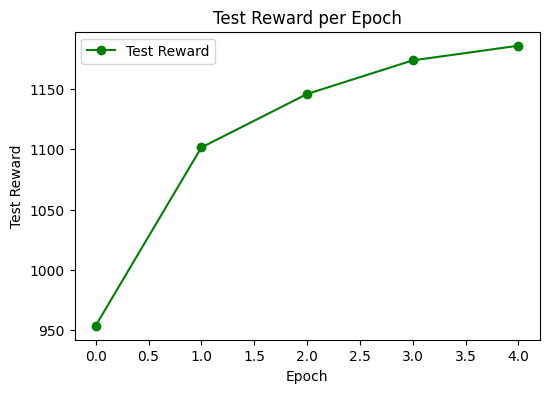

In [7]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Read the log file
with open("logs/NMD-PG-MH-64-changed-hyperparameters.txt", "r") as f:
    lines = f.readlines()

# Initialize lists to collect training and test data
train_data = []
test_data = []
current_epoch = None

# Process each line in the log file
for line in lines:
    line = line.strip()

    # Check for epoch header line (e.g., "--------------------epoch:  0 ---------------------")
    epoch_match = re.match(r"-+epoch:\s+(\d+)\s*-+", line)
    if epoch_match:
        current_epoch = int(epoch_match.group(1))
        continue

    # Parse training lines
    train_match = re.match(
        r"epoch train:(\d+),.*reward:\s*([-\d.]+)\s+loss:\s*([-\d.]+)\s+mle:\s*([-\d.]+)\s+beta:\s*([-\d.]+)",
        line
    )
    if train_match:
        train_epoch = int(train_match.group(1))
        reward = float(train_match.group(2))
        loss = float(train_match.group(3))
        mle = float(train_match.group(4))
        beta = float(train_match.group(5))
        train_data.append({
            "epoch": train_epoch,
            "reward": reward,
            "loss": loss,
            "mle": mle,
            "beta": beta
        })
        continue

    # Parse test lines (if any)
    test_match = re.match(
        r"test aver_reward:\s*([-\d.]+)\s+test MLE_loss:\s*([-\d.]+)",
        line
    )
    if test_match:
        test_reward = float(test_match.group(1))
        test_mle = float(test_match.group(2))
        test_data.append({
            "epoch": current_epoch,
            "test_reward": test_reward,
            "test_mle": test_mle
        })

# Create DataFrames
df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)

# Visualize Training Metrics including mle
plt.figure(figsize=(15, 4))

# Plot Reward
plt.subplot(1, 3, 1)
plt.plot(df_train["epoch"], df_train["reward"], marker="o", label="Train Reward")
plt.xlabel("Epoch")
plt.ylabel("Reward")
plt.title("Training Reward per Epoch")
plt.legend()

# Plot Loss
plt.subplot(1, 3, 2)
plt.plot(df_train["epoch"], df_train["loss"], marker="o", color="red", label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.legend()

# Plot MLE
plt.subplot(1, 3, 3)
plt.plot(df_train["epoch"], df_train["mle"], marker="o", color="purple", label="Train MLE")
plt.xlabel("Epoch")
plt.ylabel("MLE")
plt.title("Training (ground truth - prediction) loss per Epoch")
plt.legend()

plt.tight_layout()
plt.show()

# Visualize Test Metrics if available
if not df_test.empty:
    plt.figure(figsize=(6, 4))
    plt.plot(df_test["epoch"], df_test["test_reward"], marker="o", color="green", label="Test Reward")
    plt.xlabel("Epoch")
    plt.ylabel("Test Reward")
    plt.title("Test Reward per Epoch")
    plt.legend()
    plt.show()



### To get all the modified code and trained models:

In [ ]:
!zip -r /content/file_all.zip /content/RL-Chord

  adding: content/RL-Chord/ (stored 0%)
  adding: content/RL-Chord/LSTM_evaluate.py (deflated 80%)
  adding: content/RL-Chord/DQN-Chord_train.py (deflated 76%)
  adding: content/RL-Chord/model/ (stored 0%)
  adding: content/RL-Chord/model/CLSTM_Chord_OH.py (deflated 69%)
  adding: content/RL-Chord/model/NoisyLayers.py (deflated 71%)
  adding: content/RL-Chord/model/BLSTM_Chord_MH.py (deflated 70%)
  adding: content/RL-Chord/model/CLSTM_Chord_MH.py (deflated 72%)
  adding: content/RL-Chord/model/attention_classifier.py (deflated 66%)
  adding: content/RL-Chord/model/DQN_Chord.py (deflated 78%)
  adding: content/RL-Chord/model/Mutual_Chord.py (deflated 66%)
  adding: content/RL-Chord/model/PG_Chord.py (deflated 72%)
  adding: content/RL-Chord/model/PPO_Chord.py (deflated 72%)
  adding: content/RL-Chord/model/__pycache__/ (stored 0%)
  adding: content/RL-Chord/model/__pycache__/PPO_Chord.cpython-38.pyc (deflated 45%)
  adding: content/RL-Chord/model/__pycache__/PPO_Chord.cpython-311.pyc (